In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [3]:
df=pd.read_excel("C:/Users/Falguni Jain/Downloads/avocado_prices.xlsx")

In [4]:
print(df)

         Date  AveragePrice  Total Volume      Region
0  2018-01-31          1.05          2000  California
1  2018-02-28          1.10          2100  California
2  2018-03-31          1.15          2200  California
3  2018-04-30          1.20          2300  California
4  2018-05-31          1.18          2400  California
5  2018-06-30          1.25          2500  California
6  2018-07-31          1.30          2450  California
7  2018-08-31          1.28          2550  California
8  2018-09-30          1.22          2600  California
9  2018-10-31          1.15          2700  California
10 2018-11-30          1.10          2800  California
11 2018-12-31          1.08          2900  California
12 2019-01-31          1.12          2950  California
13 2019-02-28          1.18          3000  California
14 2019-03-31          1.25          3100  California
15 2019-04-30          1.22          3200  California
16 2019-05-31          1.28          3300  California
17 2019-06-30          1.35 

In [5]:
df.head()

,Date,AveragePrice,Total Volume,Region
0,2018-01-31,1.05,2000,California
1,2018-02-28,1.10,2100,California
2,2018-03-31,1.15,2200,California
3,2018-04-30,1.20,2300,California
4,2018-05-31,1.18,2400,California


In [6]:
df.tail()

,Date,AveragePrice,Total Volume,Region
19,2019-08-31,1.25,3500,California
20,2019-09-30,1.20,3550,California
21,2019-10-31,1.18,3600,California
22,2019-11-30,1.15,3700,California
23,2019-12-31,1.10,3800,California


In [7]:
df.info 

<bound method DataFrame.info of          Date  AveragePrice  Total Volume      Region
0  2018-01-31          1.05          2000  California
1  2018-02-28          1.10          2100  California
2  2018-03-31          1.15          2200  California
3  2018-04-30          1.20          2300  California
4  2018-05-31          1.18          2400  California
5  2018-06-30          1.25          2500  California
6  2018-07-31          1.30          2450  California
7  2018-08-31          1.28          2550  California
8  2018-09-30          1.22          2600  California
9  2018-10-31          1.15          2700  California
10 2018-11-30          1.10          2800  California
11 2018-12-31          1.08          2900  California
12 2019-01-31          1.12          2950  California
13 2019-02-28          1.18          3000  California
14 2019-03-31          1.25          3100  California
15 2019-04-30          1.22          3200  California
16 2019-05-31          1.28          3300  Califor

In [8]:
df.describe()

,Date,AveragePrice,Total Volume
count,24,24.000000,24.000000
mean,2019-01-14 10:00:00,1.193333,2918.750000
min,2018-01-31 00:00:00,1.050000,2000.000000
25%,2018-07-23 06:00:00,1.142500,2487.500000
50%,2019-01-15 12:00:00,1.190000,2925.000000
75%,2019-07-07 18:00:00,1.250000,3412.500000
max,2019-12-31 00:00:00,1.350000,3800.000000
std,NaN,0.079272,541.498023


In [9]:
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)


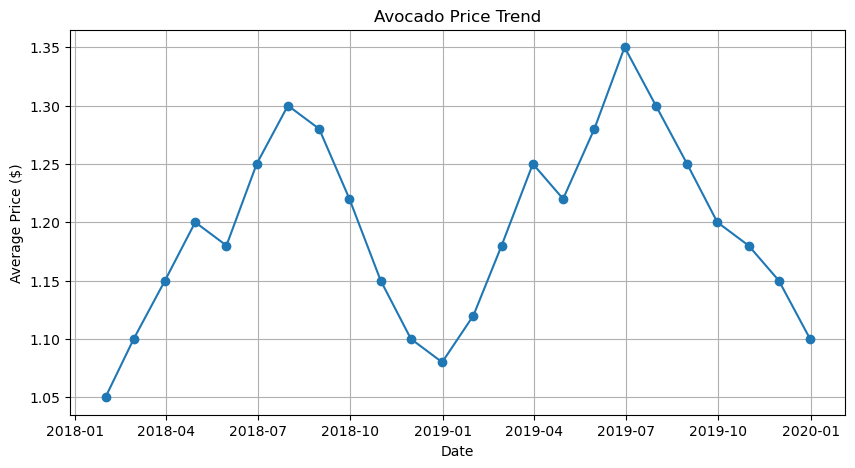

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["AveragePrice"], marker="o")
plt.title("Avocado Price Trend")
plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()

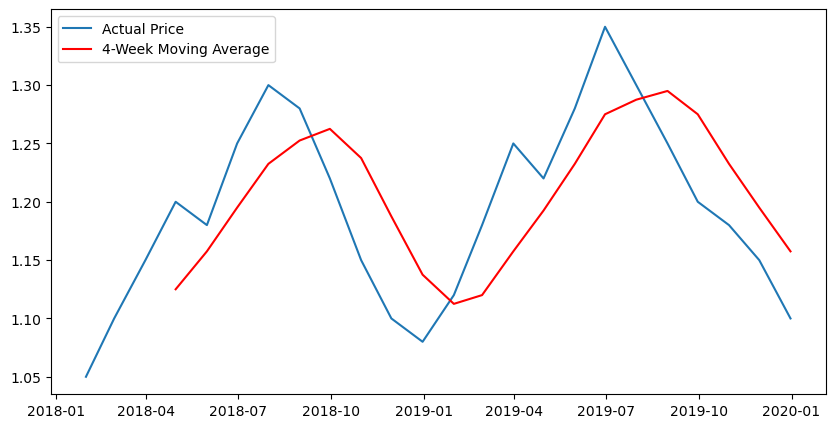

In [11]:
df["Price_MA"] = df["AveragePrice"].rolling(window=4).mean()
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["AveragePrice"], label="Actual Price")
plt.plot(df["Date"], df["Price_MA"], label="4-Week Moving Average", color="red")
plt.legend()
plt.show()

In [12]:
df["Date_ordinal"] = df["Date"].map(pd.Timestamp.toordinal)

X = df[["Date_ordinal"]]
y = df["AveragePrice"]

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample training (you probably already did this)
df["Date_ordinal"] = df["Date"].map(pd.Timestamp.toordinal)
X = df["Date_ordinal"].values.reshape(-1, 1)
y = df["AveragePrice"]

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
future_dates = pd.date_range(df["Date"].max() + pd.Timedelta(days=1), periods=10, freq="W")

In [16]:
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

In [17]:
future_preds = model.predict(future_ordinals)

In [18]:
forecast_df = pd.DataFrame({"Date": future_dates, "PredictedPrice": future_preds})
print(forecast_df)

        Date  PredictedPrice
0 2020-01-05        1.222586
1 2020-01-12        1.223161
2 2020-01-19        1.223737
3 2020-01-26        1.224313
4 2020-02-02        1.224889
5 2020-02-09        1.225465
6 2020-02-16        1.226041
7 2020-02-23        1.226617
8 2020-03-01        1.227192
9 2020-03-08        1.227768


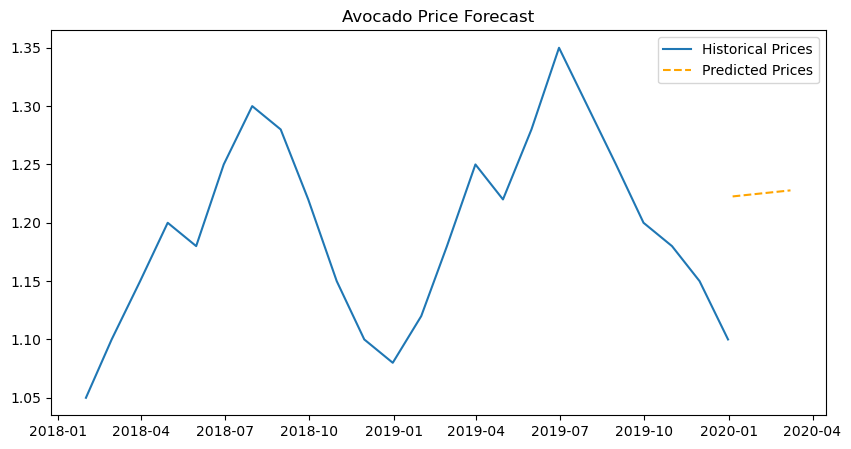

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["AveragePrice"], label="Historical Prices")
plt.plot(future_dates, future_preds, label="Predicted Prices", linestyle="dashed", color="orange")
plt.legend()
plt.title("Avocado Price Forecast")
plt.show()